In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

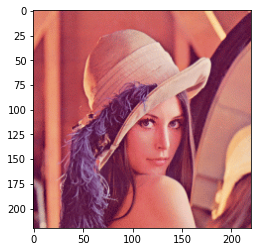

In [2]:
img = cv2.imread('lena_color.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
# vamos aplicar a equalização de histogramas na imagem: lena_color.png

cv2.equalizeHist(img)

error: ignored

Text(0.5, 1.0, 'Blue')

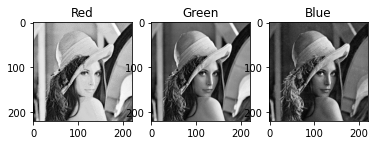

In [5]:
# vamos separar as camadas de cor

R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

plt.subplot(131)
plt.imshow(R, cmap='gray')
plt.title('Red')

plt.subplot(132)
plt.imshow(G, cmap='gray')
plt.title('Green')

plt.subplot(133)
plt.imshow(B, cmap='gray')
plt.title('Blue')

Text(0.5, 1.0, 'Blue')

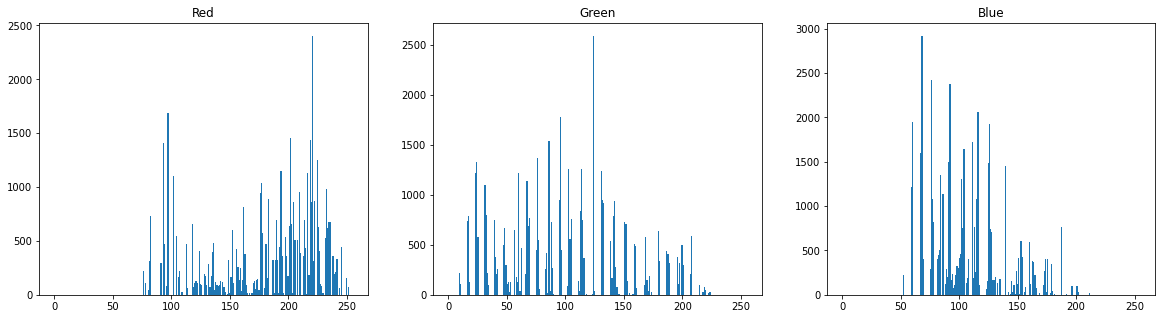

In [12]:
# vamos separar as camadas de cor

R_hist = R.flatten()
G_hist = G.flatten()
B_hist = B.flatten()

plt.figure(figsize=(20,5))
plt.subplot(131)
hist = plt.hist(R_hist, range=[0, 255], bins=256)
plt.title('Red')

plt.subplot(132)
hist = plt.hist(G_hist, range=[0, 255], bins=256)
plt.title('Green')

plt.subplot(133)
hist = plt.hist(B_hist, range=[0, 255], bins=256)
plt.title('Blue')

Text(0.5, 1.0, 'Blue equalizado')

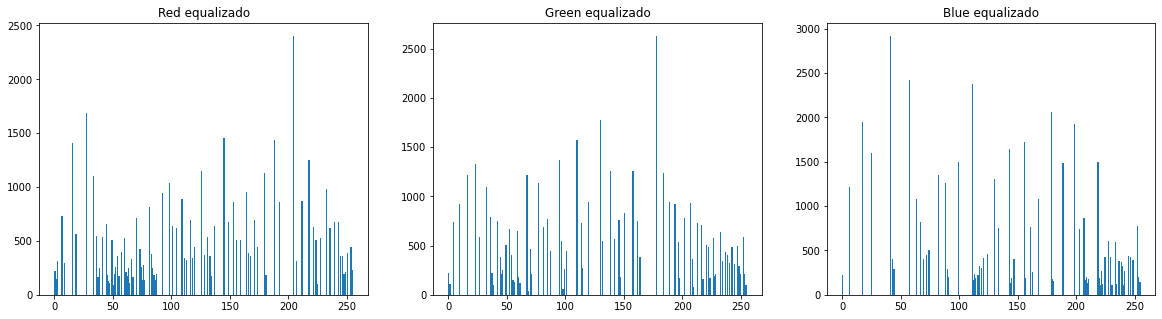

In [15]:
# agora vamos aplicar o equalizador de histograma em cada uma das camdas

R_equalize = cv2.equalizeHist(R)
G_equalize = cv2.equalizeHist(G)
B_equalize = cv2.equalizeHist(B)

plt.figure(figsize=(20,5))
plt.subplot(131)
hist = plt.hist(R_equalize.flatten(), range=[0, 255], bins=256)
plt.title('Red equalizado')

plt.subplot(132)
hist = plt.hist(G_equalize.flatten(), range=[0, 255], bins=256)
plt.title('Green equalizado')

plt.subplot(133)
hist = plt.hist(B_equalize.flatten(), range=[0, 255], bins=256)
plt.title('Blue equalizado')

In [16]:
R_equalize.shape

(220, 220)

Text(0.5, 1.0, 'Blue equalizado')

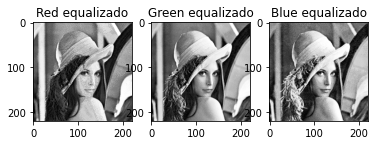

In [17]:
# vamos separar as camadas de cor

plt.subplot(131)
plt.imshow(R_equalize, cmap='gray')
plt.title('Red equalizado')

plt.subplot(132)
plt.imshow(G_equalize, cmap='gray')
plt.title('Green equalizado')

plt.subplot(133)
plt.imshow(B_equalize, cmap='gray')
plt.title('Blue equalizado')

Text(0.5, 1.0, 'Blue')

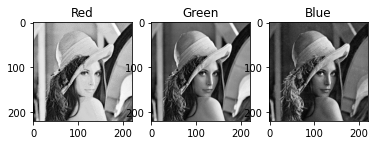

In [18]:
# vamos separar as camadas de cor
plt.subplot(131)
plt.imshow(R, cmap='gray')
plt.title('Red')

plt.subplot(132)
plt.imshow(G, cmap='gray')
plt.title('Green')

plt.subplot(133)
plt.imshow(B, cmap='gray')
plt.title('Blue')

In [19]:
# agora vamos juntar as camadas de cor

img_equalizada = cv2.merge([R_equalize, G_equalize, B_equalize])

Text(0.5, 1.0, 'lena equalizada')

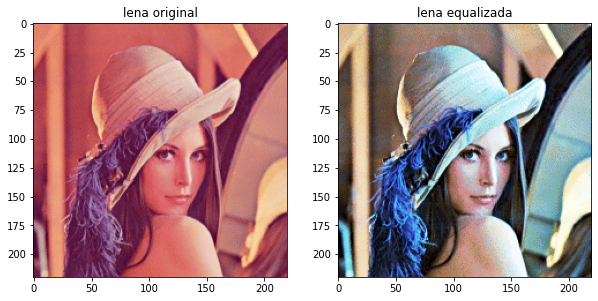

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img)
plt.title('lena original')

plt.subplot(122)
plt.imshow(img_equalizada)
plt.title('lena equalizada')

## Componentes conexos 

`cv2.findCountours`

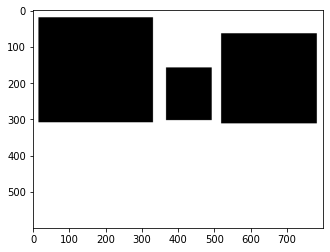

In [22]:
img = cv2.imread('shapes.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

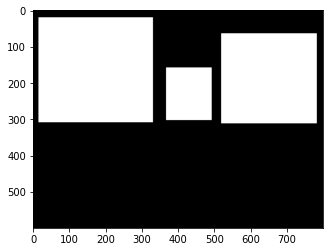

In [24]:
_, img = cv2.threshold(img, thresh=127, maxval=255, type=cv2.THRESH_BINARY_INV)
plt.imshow(img, cmap='gray')

In [25]:
contours, hierarchy = cv2.findContours(img, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

In [26]:
contours

[array([[[367, 158]],
 
        [[367, 302]],
 
        [[492, 302]],
 
        [[492, 158]]], dtype=int32), array([[[519,  64]],
 
        [[519, 311]],
 
        [[782, 311]],
 
        [[782,  64]]], dtype=int32), array([[[ 15,  20]],
 
        [[ 15, 308]],
 
        [[330, 308]],
 
        [[330,  20]]], dtype=int32)]

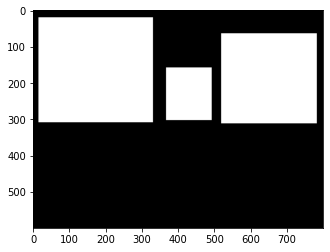

In [32]:
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img)

In [33]:
img.shape

(600, 800, 3)

In [40]:
img_contorno = cv2.drawContours(img.copy(), contours, contourIdx=0, color=(0, 255, 0), thickness=3 )

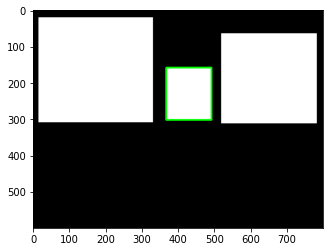

In [41]:
plt.imshow(img_contorno, )

In [45]:
img[0,0,:]

array([0, 0, 0], dtype=uint8)

In [49]:
img[:,:,0].shape

(600, 800)

In [50]:
contours, hierarchy = cv2.findContours(img[:,:,0], mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)

In [51]:
contours

[array([[[367, 158]],
 
        [[367, 159]],
 
        [[367, 160]],
 
        ...,
 
        [[370, 158]],
 
        [[369, 158]],
 
        [[368, 158]]], dtype=int32), array([[[519,  64]],
 
        [[519,  65]],
 
        [[519,  66]],
 
        ...,
 
        [[522,  64]],
 
        [[521,  64]],
 
        [[520,  64]]], dtype=int32), array([[[15, 20]],
 
        [[15, 21]],
 
        [[15, 22]],
 
        ...,
 
        [[18, 20]],
 
        [[17, 20]],
 
        [[16, 20]]], dtype=int32)]

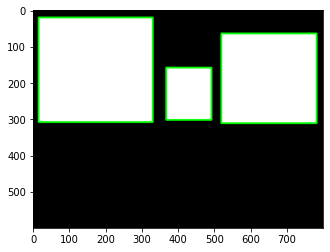

In [56]:
img_contorno = cv2.drawContours(img.copy(), contours, contourIdx=-1, color=(0, 255, 0), thickness=3 )
plt.imshow(img_contorno)

In [58]:
# coletando dados das segmentações (contours)

# calcar a área
area_0 = cv2.contourArea(contours[0])
area_1 = cv2.contourArea(contours[1])
area_2 = cv2.contourArea(contours[2])

In [59]:
print(f'Area 0: {area_0} \nArea 1: {area_1} \nArea 2: {area_2} \n')

Area 0: 18000.0 
Area 1: 64961.0 
Area 2: 90720.0 



In [61]:
# calcular o perímetro do segmento (contour)

perimetro_0 = cv2.arcLength(contours[0], True)
perimetro_0

538.0

In [ ]:
cv2.